# Importing Libraries

In [2]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\ayush\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\ayush\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\ayush\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\ayush\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\ayush\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\ayush\anaconda3\lib\site-packages\pip\

In [1]:
# Importing necessary libraries
import pandas as pd # For handling data frames
import numpy as np # For numerical operations
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV # For model evaluation and search
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score # For performance metrics
from sklearn.tree import DecisionTreeClassifier # For Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # For Random Forest Classifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # For encoding categorical variables
from sklearn.compose import ColumnTransformer # For applying transformations to columns
from sklearn.pipeline import Pipeline # For creating machine learning pipelines
from skopt import BayesSearchCV # For Bayesian Optimization
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns # For data visualization

# Loading the Data

In [2]:
# Reading the training and testing data from CSV files
train_data = pd.read_csv(r'C:\Users\ayush\Downloads\Insurance Fraud - TRAIN-3000.csv')
test_data = pd.read_csv(r'C:\Users\ayush\Downloads\Insurance Fraud -TEST-12900.csv')

In [3]:
train_data.head() # Display the first few rows of the training data

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,...,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,26_to_30,No,No,External,3_to_5,no_change,1-vehicle,1994,Collision,Yes
1,Nov,5,Monday,Mazda,Urban,Wednesday,Dec,1,Male,Single,...,over_65,No,No,External,none,no_change,1-vehicle,1994,All_Perils,Yes
2,Jan,1,Monday,Pontiac,Urban,Wednesday,Jan,1,Male,Married,...,41_to_50,No,No,External,none,under_6_months,1-vehicle,1994,All_Perils,Yes
3,Dec,1,Monday,Toyota,Rural,Tuesday,May,3,Male,Married,...,36_to_40,No,No,External,more_than_5,under_6_months,2-vehicles,1994,All_Perils,Yes
4,Dec,5,Wednesday,Pontiac,Urban,Wednesday,Jan,1,Male,Single,...,36_to_40,No,No,External,more_than_5,no_change,1-vehicle,1994,Collision,Yes


In [4]:
test_data.head() # Display the first few rows of the testing data

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,...,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,26_to_30,No,No,External,3_to_5,no_change,1-vehicle,1994,Collision,Yes
1,Nov,5,Monday,Mazda,Urban,Wednesday,Dec,1,Male,Single,...,over_65,No,No,External,none,no_change,1-vehicle,1994,All_Perils,Yes
2,Jan,1,Monday,Pontiac,Urban,Wednesday,Jan,1,Male,Married,...,41_to_50,No,No,External,none,under_6_months,1-vehicle,1994,All_Perils,Yes
3,Dec,1,Monday,Toyota,Rural,Tuesday,May,3,Male,Married,...,36_to_40,No,No,External,more_than_5,under_6_months,2-vehicles,1994,All_Perils,Yes
4,Dec,5,Wednesday,Pontiac,Urban,Wednesday,Jan,1,Male,Single,...,36_to_40,No,No,External,more_than_5,no_change,1-vehicle,1994,Collision,Yes


In [5]:
train_data.describe() 
# Display descriptive statistics of the training data

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,2.781260,2.671224,40.055352,8.511837,407.302434,2.496832,1995.114038
std,1.286055,1.261614,13.497026,4.601437,41.847258,1.118365,0.606007
min,1.000000,1.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,4.000000,400.000000,1.000000,1995.000000
50%,3.000000,3.000000,38.000000,9.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,49.000000,12.000000,400.000000,3.000000,1995.000000
max,5.000000,5.000000,80.000000,16.000000,700.000000,4.000000,1996.000000


In [6]:
train_data.info() # Display information about data types and missing values in the training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 2999 non-null   object
 1   WEEKOFMONTH           2999 non-null   int64 
 2   DAYOFWEEK             2999 non-null   object
 3   MAKE                  2999 non-null   object
 4   ACCIDENTAREA          2999 non-null   object
 5   DAYOFWEEKCLAIMED      2999 non-null   object
 6   MONTHCLAIMED          2999 non-null   object
 7   WEEKOFMONTHCLAIMED    2999 non-null   int64 
 8   SEX                   2999 non-null   object
 9   MARITALSTATUS         2999 non-null   object
 10  AGE                   2999 non-null   int64 
 11  FAULT                 2999 non-null   object
 12  POLICYTYPE            2999 non-null   object
 13  VEHICLECATEGORY       2999 non-null   object
 14  VEHICLEPRICE          2999 non-null   object
 15  REPNUMBER             2999 non-null   

In [7]:
train_data.isnull().sum() # Display the count of missing values in each column of the training data

MONTH                   0
WEEKOFMONTH             0
DAYOFWEEK               0
MAKE                    0
ACCIDENTAREA            0
DAYOFWEEKCLAIMED        0
MONTHCLAIMED            0
WEEKOFMONTHCLAIMED      0
SEX                     0
MARITALSTATUS           0
AGE                     0
FAULT                   0
POLICYTYPE              0
VEHICLECATEGORY         0
VEHICLEPRICE            0
REPNUMBER               0
DEDUCTIBLE              0
DRIVERRATING            0
DAYS_POLICY_ACCIDENT    0
DAYS_POLICY_CLAIM       0
PASTNUMBEROFCLAIMS      0
AGEOFVEHICLE            0
AGEOFPOLICYHOLDER       0
POLICEREPORTFILED       0
WITNESSPRESENT          0
AGENTTYPE               0
NUMBEROFSUPPLIMENTS     0
ADDRESSCHANGE_CLAIM     0
NUMBEROFCARS            0
YEAR                    0
BASEPOLICY              0
FRAUDFOUND              0
dtype: int64

# Encoding the Target Variable (Fraud Detection)

In [8]:
# Label Encoding the target variable 'FRAUDFOUND' (fraud status: 0 = No, 1 = Yes)
label_encoder = LabelEncoder()
train_data['FRAUDFOUND'] = label_encoder.fit_transform(train_data['FRAUDFOUND'])
# Print unique values of the target variable to confirm encoding
print(train_data['FRAUDFOUND'].unique())  # Should print [0, 1] if "No" = 0 and "Yes" = 1


[1 0]


# Visualizing Data Distributions

## Categorical Features Distribution

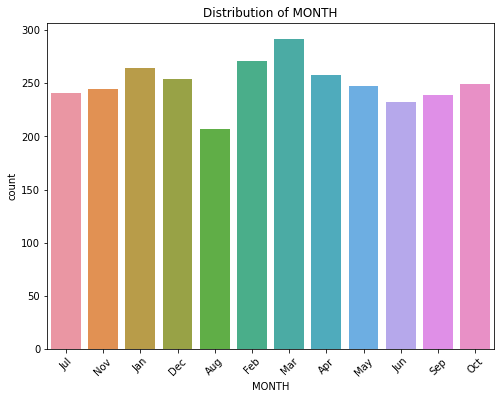

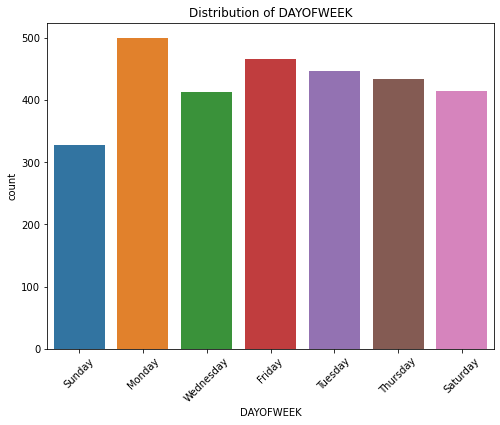

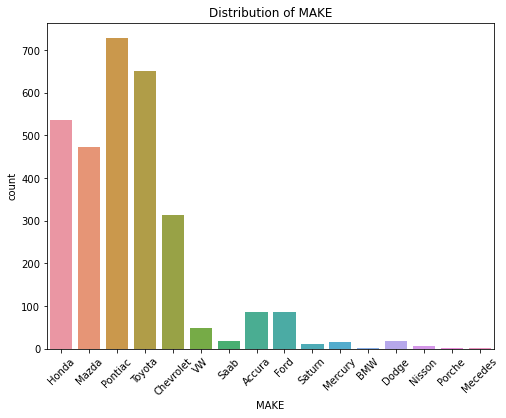

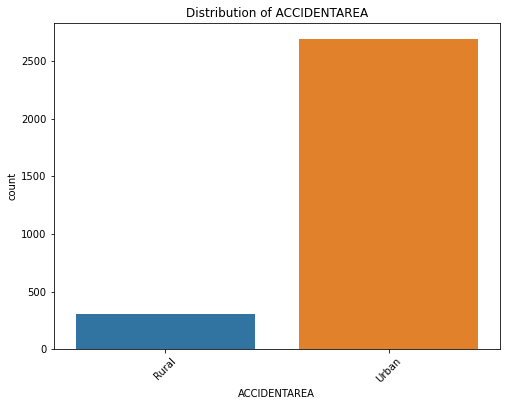

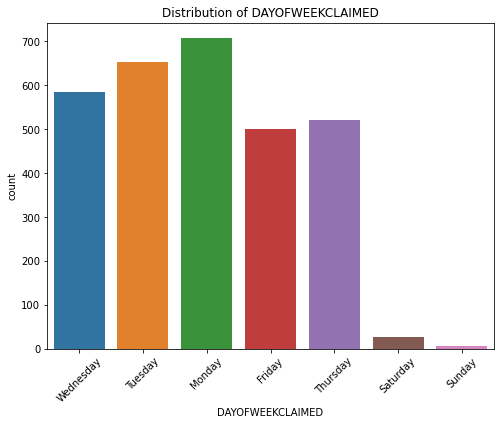

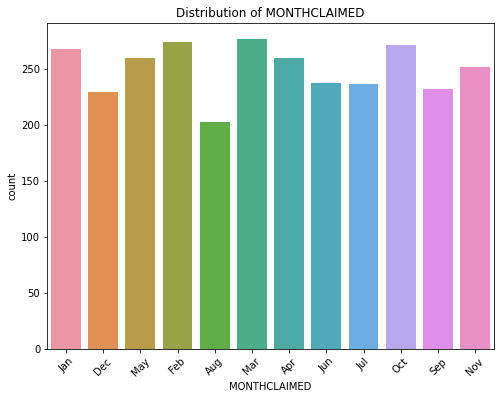

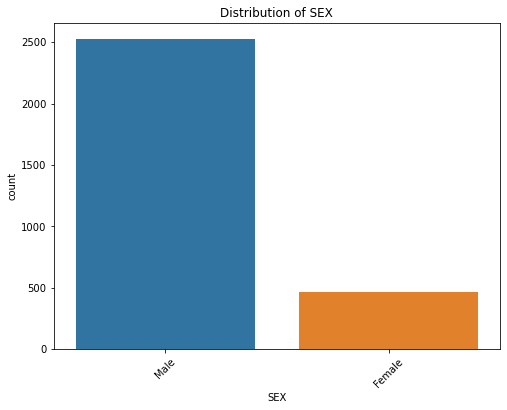

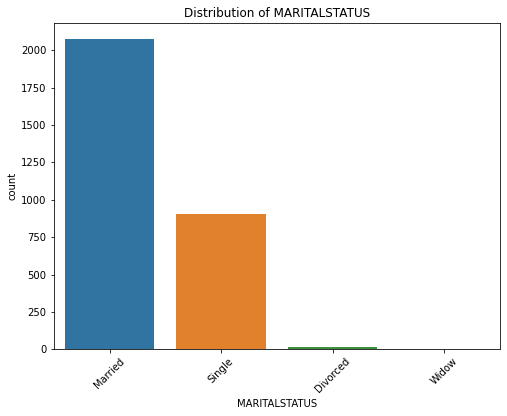

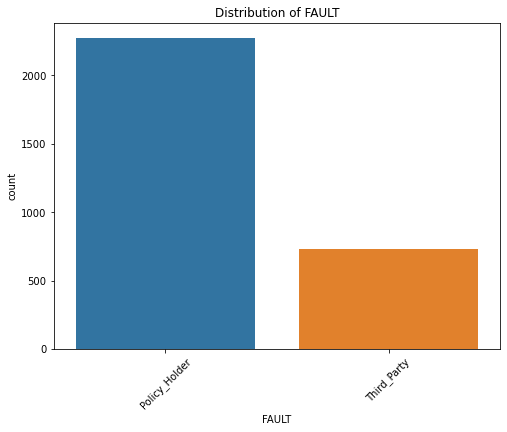

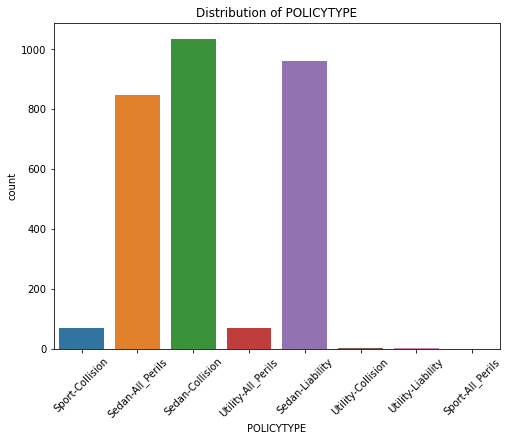

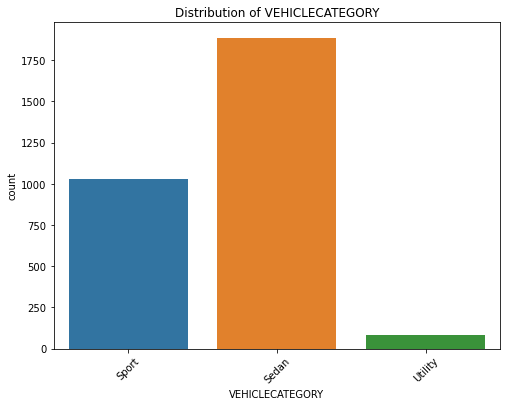

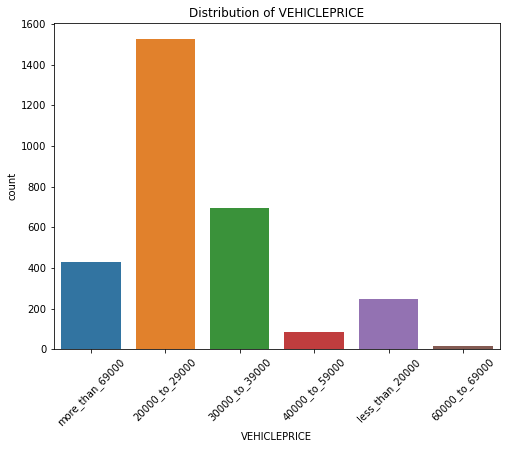

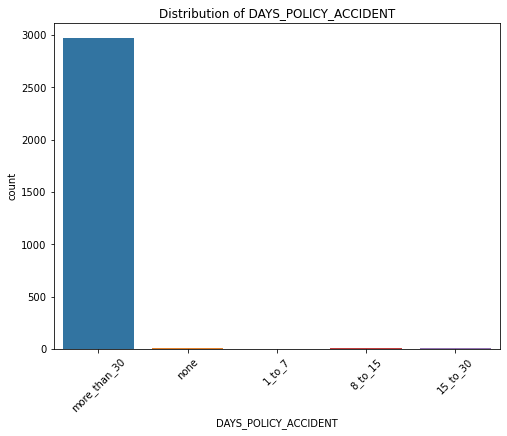

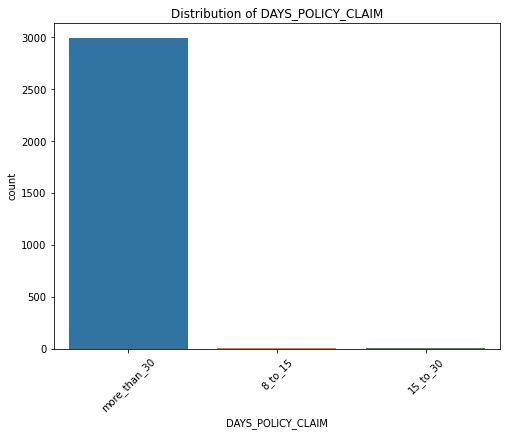

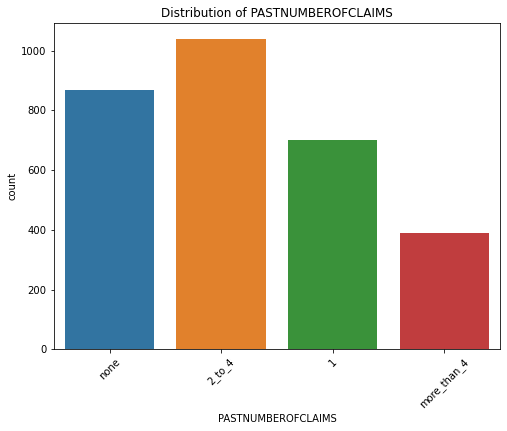

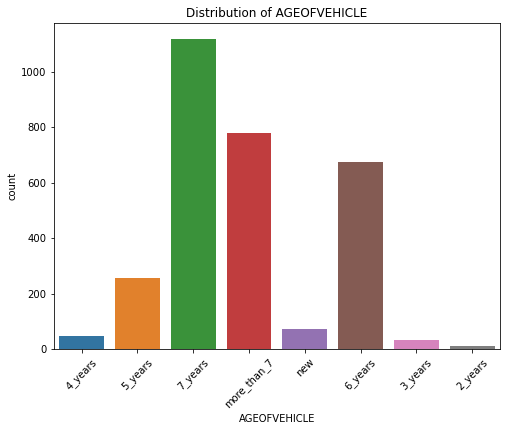

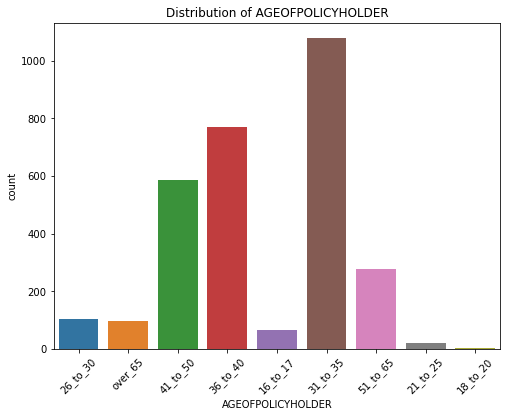

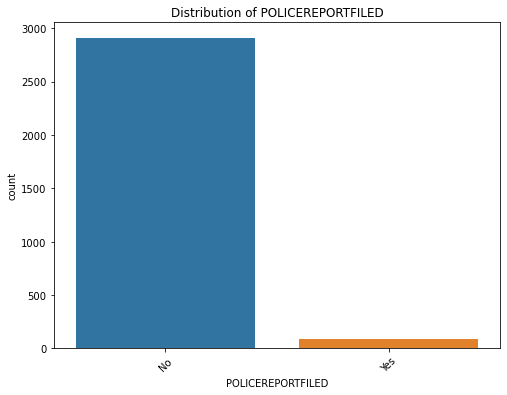

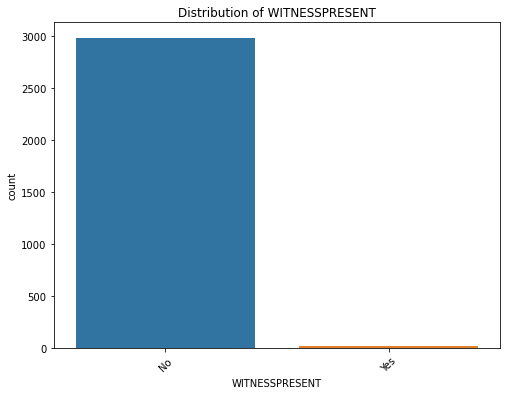

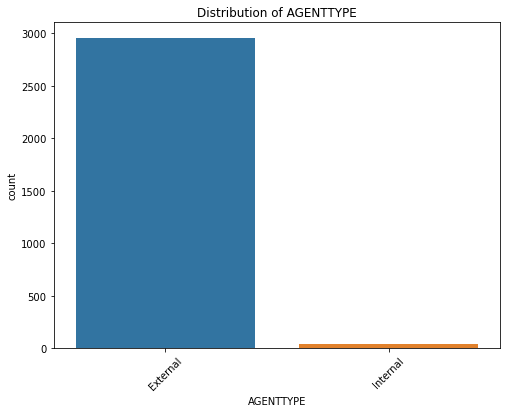

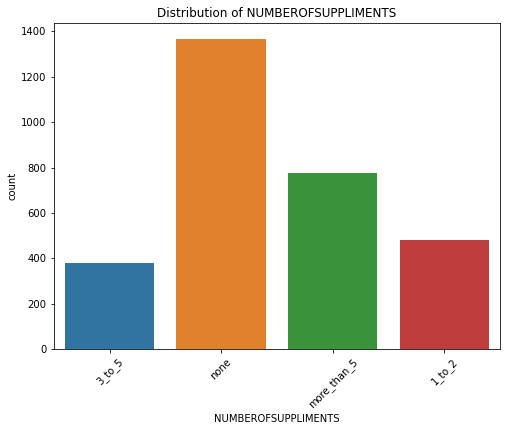

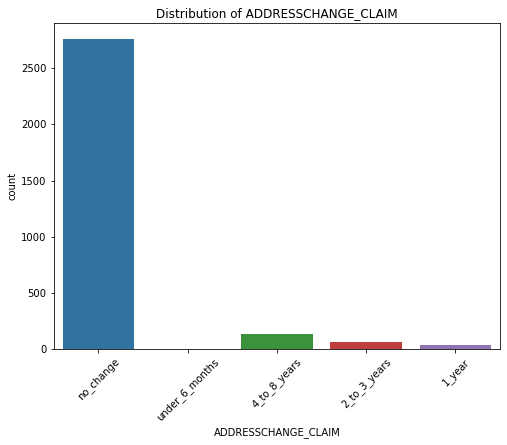

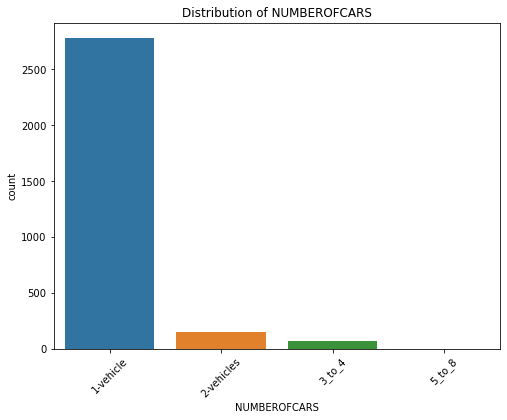

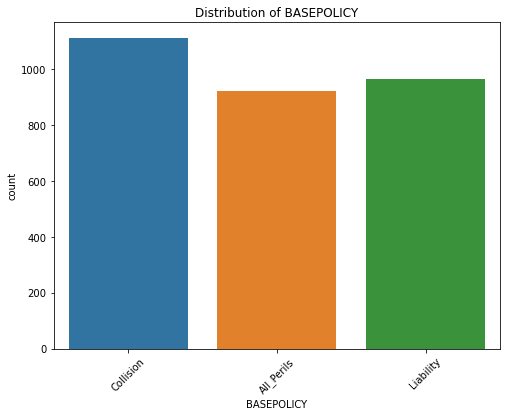

In [9]:
# Plot distribution for categorical features
categorical_cols = train_data.select_dtypes(include=['object']).columns # Identify categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6)) # Set plot size
    sns.countplot(x=col, data=train_data) # Create count plot for each categorical column
    plt.title(f'Distribution of {col}') # Set title
    plt.xticks(rotation=45) # Rotate x-axis labels for readability
    plt.show() # Display plot


## Numerical Features Distribution

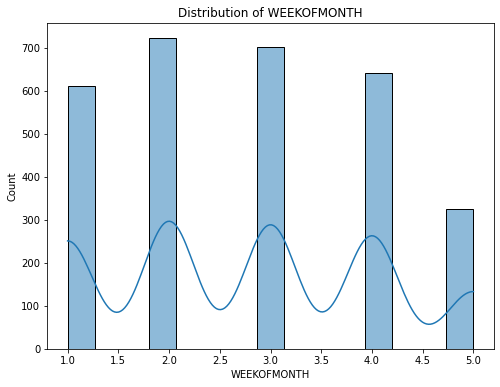

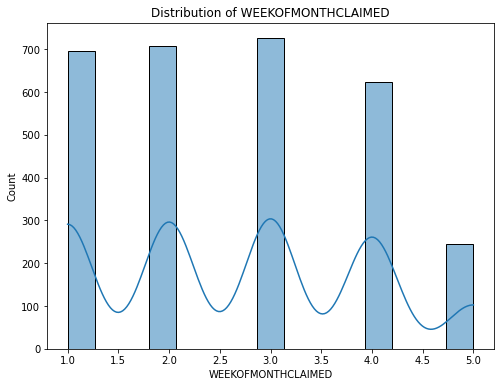

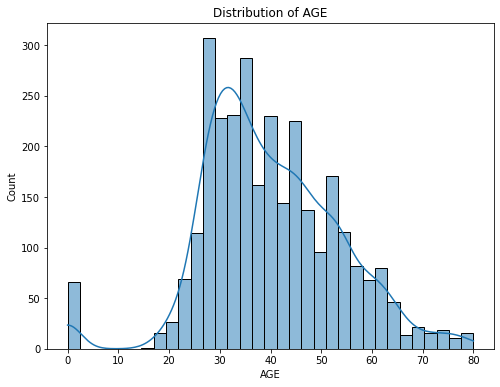

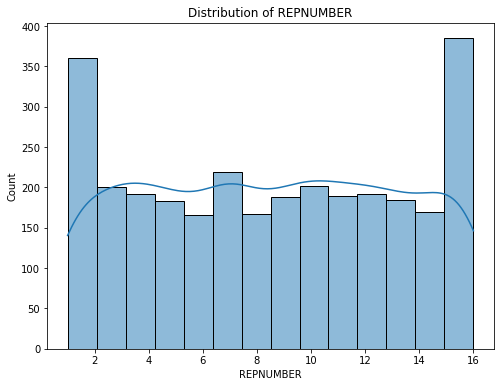

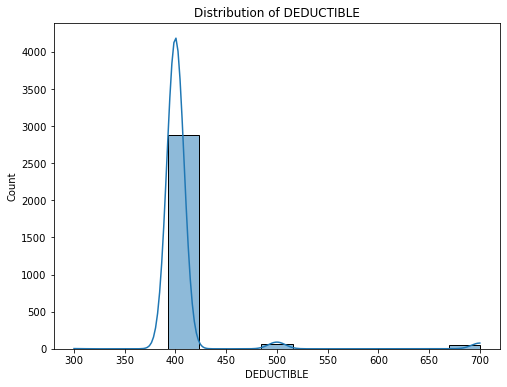

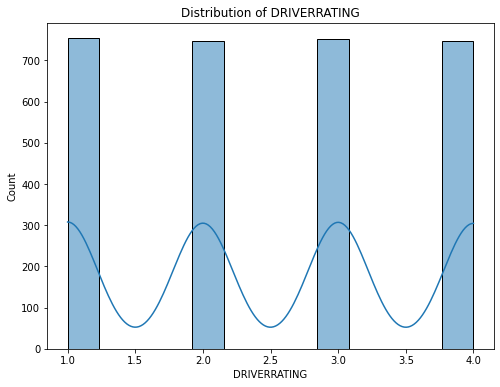

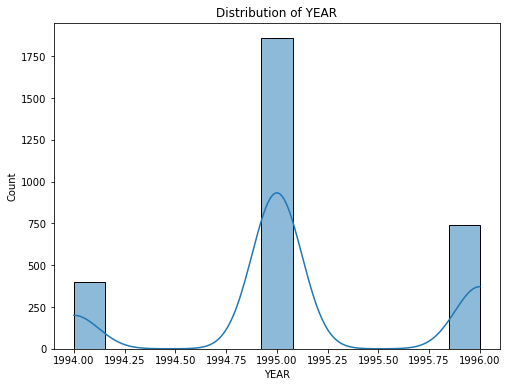

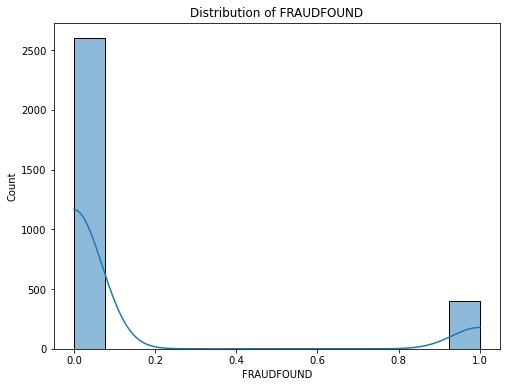

In [10]:
# Plot distribution for numerical features
numerical_cols = train_data.select_dtypes(include=[np.number]).columns # Identify numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6)) # Set plot size
    sns.histplot(train_data[col], kde=True) # Create histogram with kernel density estimate
    plt.title(f'Distribution of {col}') # Set title
    plt.show() # Display plot


## Categorical Features vs Target Variable

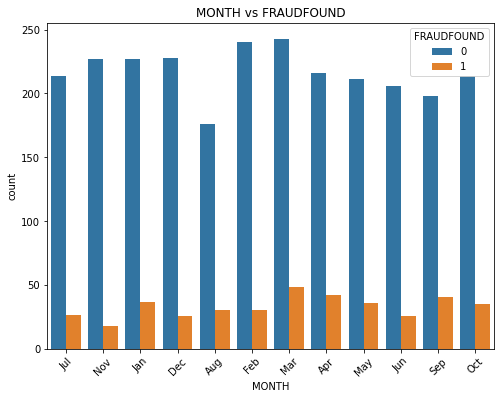

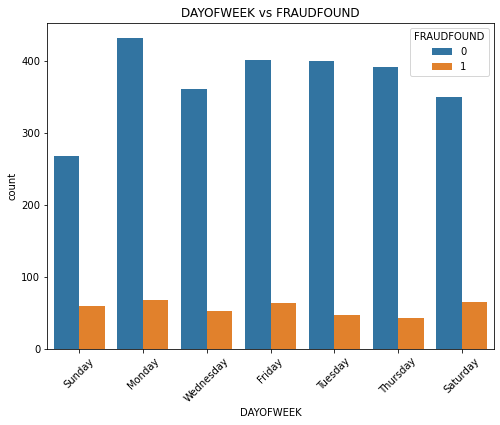

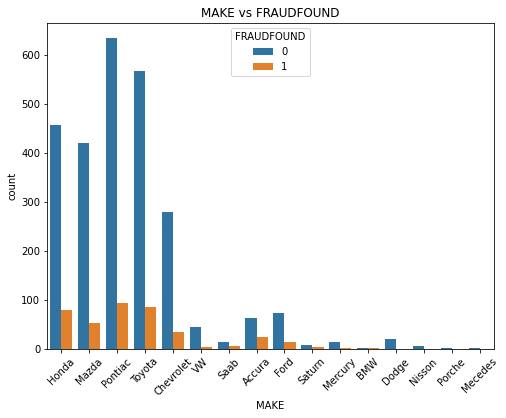

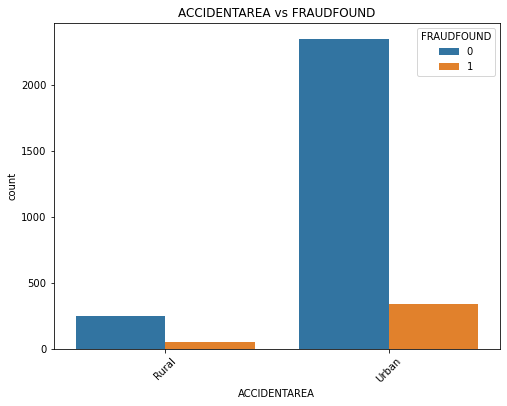

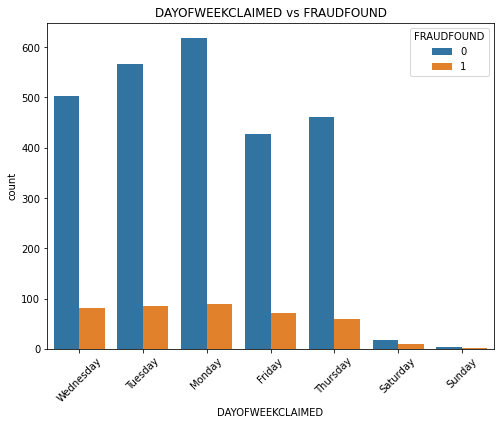

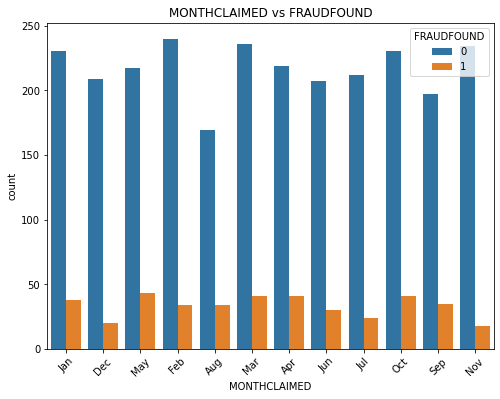

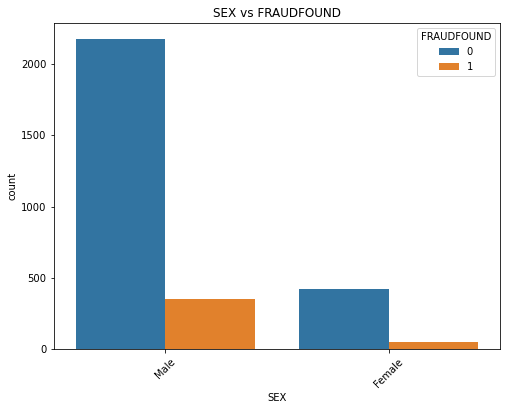

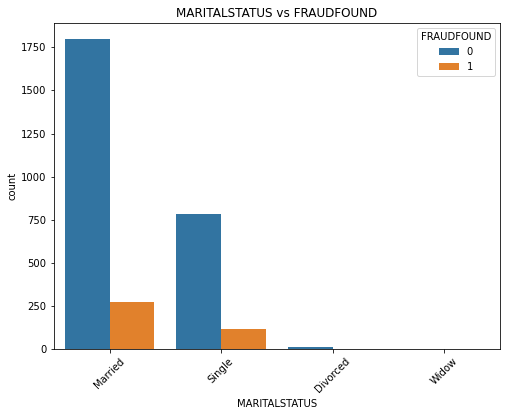

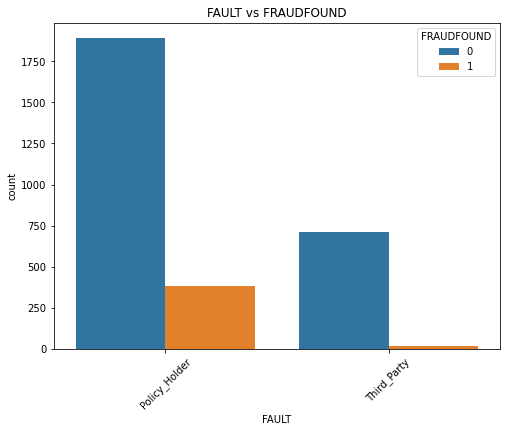

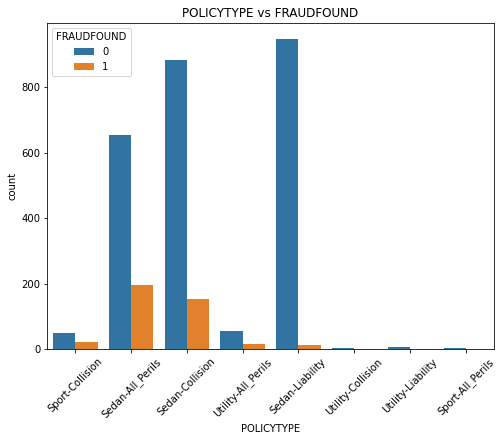

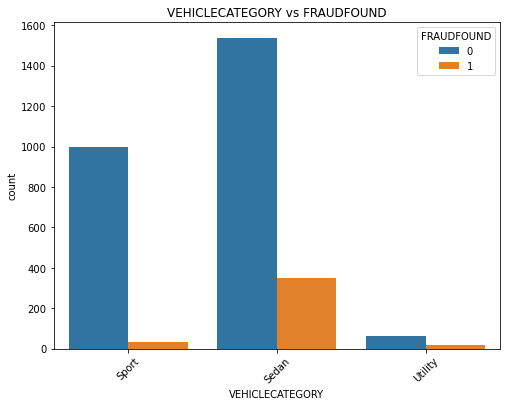

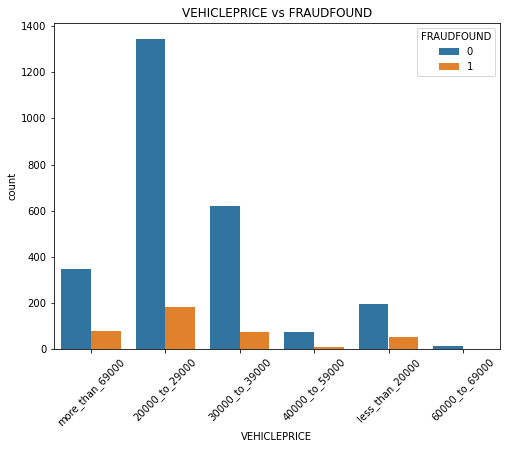

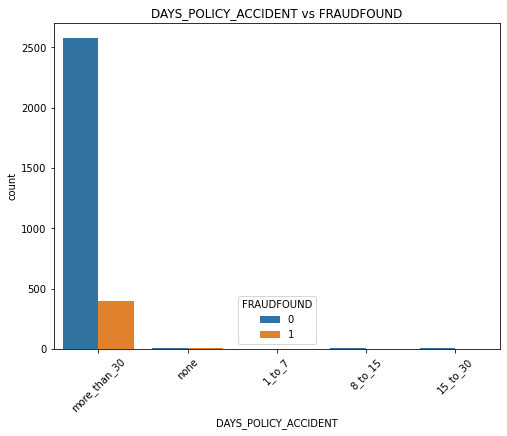

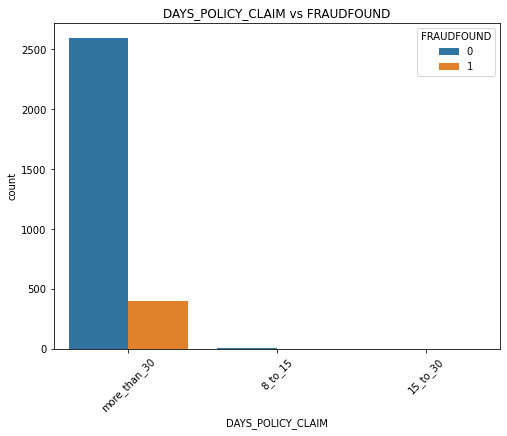

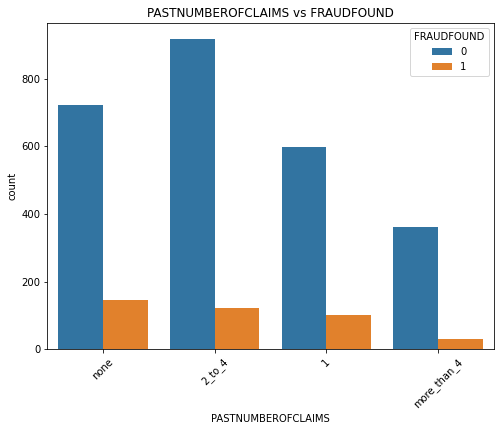

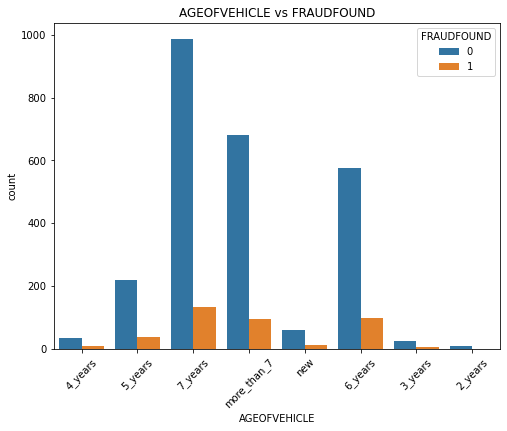

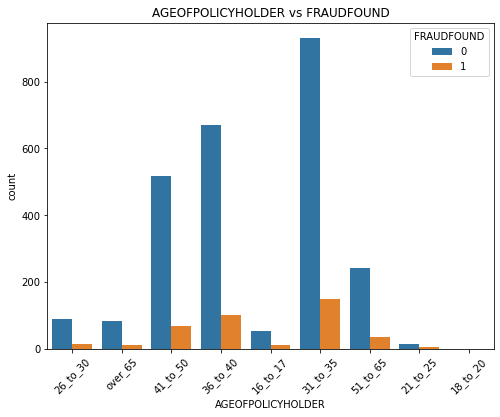

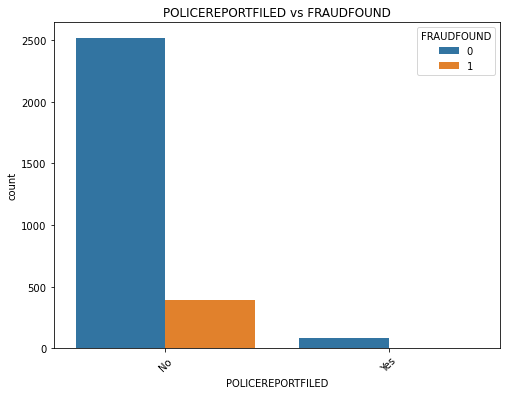

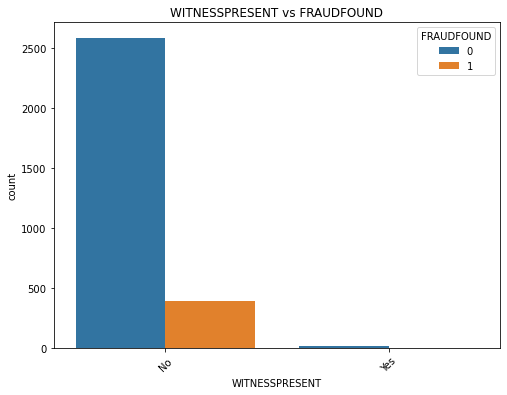

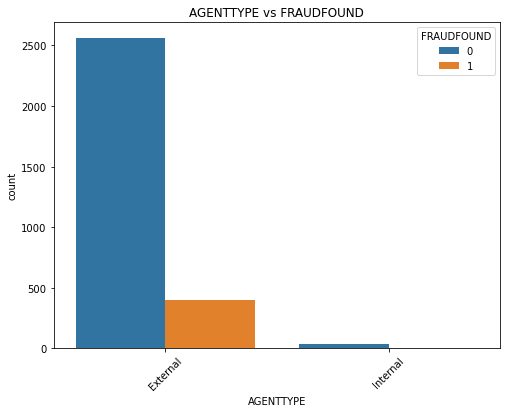

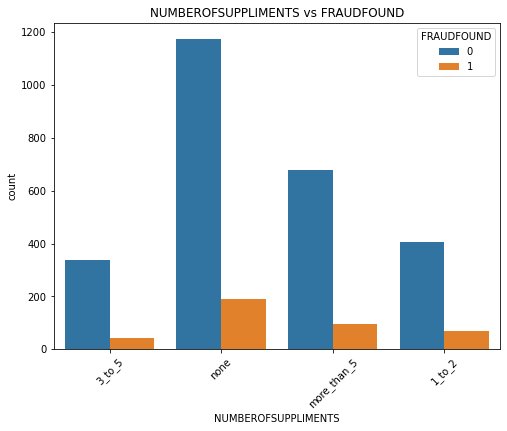

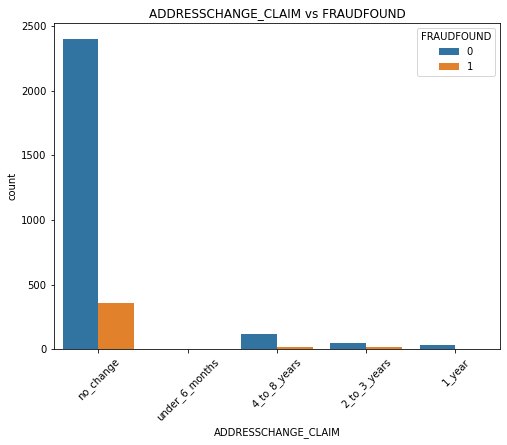

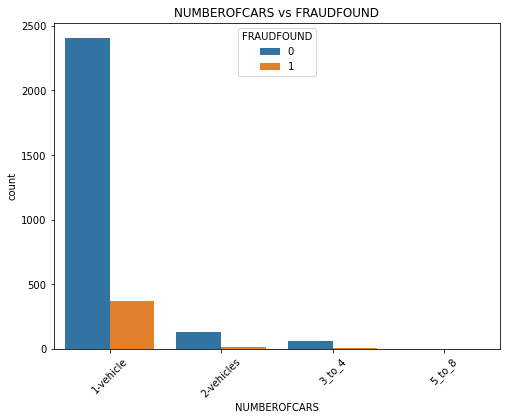

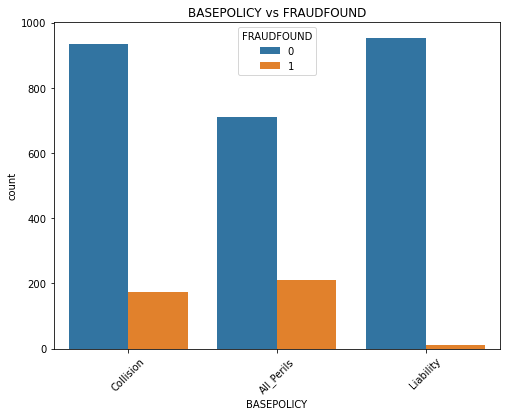

In [11]:
for col in categorical_cols:
    if col != 'FRAUDFOUND':  # Skip the target variable itself
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, hue='FRAUDFOUND', data=train_data) # Count plot with hue indicating fraud status
        plt.title(f'{col} vs FRAUDFOUND') # Set title
        plt.xticks(rotation=45) # Rotate x-axis labels for readability
        plt.show() # Display plot


In [12]:
print(train_data.columns)


Index(['MONTH', 'WEEKOFMONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA',
       'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'WEEKOFMONTHCLAIMED', 'SEX',
       'MARITALSTATUS', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY',
       'VEHICLEPRICE', 'REPNUMBER', 'DEDUCTIBLE', 'DRIVERRATING',
       'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS',
       'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED',
       'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS',
       'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'YEAR', 'BASEPOLICY',
       'FRAUDFOUND'],
      dtype='object')


# Data Preprocessing

In [13]:
# Drop 'FRAUDFOUND' from X, which should only contain feature columns
X = train_data.drop('FRAUDFOUND', axis=1)  # Exclude the target variable
y = train_data['FRAUDFOUND']  # This is your target variable

# Define the categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),  # Apply OneHotEncoder to categorical columns
    ],
    remainder='passthrough'  # Keep numeric columns as they are
)

# Apply the transformation
X_processed = preprocessor.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)
# Split the data into training and testing sets (70% training, 30% testing)

## Hyperparameter Tuning for Models

## Decision Tree Classifier - Random Search

In [15]:
# Create a Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_param_grid = {  # Define the hyperparameter grid for random search
    'max_depth': [None, 10, 20, 30], # Max depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'criterion': ['gini', 'entropy'] # Splitting criterion
}
dt_random_search = RandomizedSearchCV(dt_classifier, dt_param_grid, n_iter=10, cv=5, random_state=42) # Perform Randomized Search on Decision Tree hyperparameters
dt_random_search.fit(X_train, y_train)
print(f"Best parameters (Random Search): {dt_random_search.best_params_}") # Print the best hyperparameters found by Random Search


Best parameters (Random Search): {'min_samples_split': 5, 'max_depth': 10, 'criterion': 'entropy'}


## Random Forest Classifier - Grid Search

In [16]:
# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)
rf_param_grid = { # Define the hyperparameter grid for grid search
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_depth': [None, 10, 20, 30], # Max depth of each tree
    'min_samples_split': [2, 5, 10] # Minimum number of samples required to split a node
}
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5) # Perform Grid Search on Random Forest hyperparameters
rf_grid_search.fit(X_train, y_train)
print(f"Best parameters (Grid Search): {rf_grid_search.best_params_}") # Print the best hyperparameters found by Grid Search


Best parameters (Grid Search): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


## Bayesian Optimization - Decision Tree

In [17]:
# Perform Bayesian Search on Decision Tree hyperparameters
bayes_search = BayesSearchCV(
    dt_classifier,
    {
        'max_depth': (5, 30),
        'min_samples_split': (2, 10),
        'criterion': ['gini', 'entropy']
    },
    n_iter=10,
    cv=5,
    random_state=42
)
bayes_search.fit(X_train, y_train)
print(f"Best parameters (Bayesian Search): {bayes_search.best_params_}")


Best parameters (Bayesian Search): OrderedDict([('criterion', 'entropy'), ('max_depth', 9), ('min_samples_split', 7)])


## Bayesian Optimization - Random Forest

In [18]:
# Perform Bayesian Search on Random Forest hyperparameters
rf_bayes_search = BayesSearchCV(
    rf_classifier,
    {
        'n_estimators': (50, 300),  # Range of estimators
        'max_depth': (5, 30),
        'min_samples_split': (2, 10)
    },
    n_iter=10,
    cv=5,
    random_state=42
)
rf_bayes_search.fit(X_train, y_train)
print(f"Best parameters (Bayesian Search - Random Forest): {rf_bayes_search.best_params_}")


Best parameters (Bayesian Search - Random Forest): OrderedDict([('max_depth', 29), ('min_samples_split', 8), ('n_estimators', 268)])


## Decision Tree - Grid Search

In [19]:
# Perform Grid Search to find the best hyperparameters for the Decision Tree model
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5) # Initialize GridSearchCV with 5-fold cross-validation
dt_grid_search.fit(X_train, y_train) # Fit the GridSearchCV model on the training data
# Output the best hyperparameters found by GridSearchCV
print(f"Best parameters (Grid Search - Decision Tree): {dt_grid_search.best_params_}") # Print the best parameters


Best parameters (Grid Search - Decision Tree): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}


## Random Forest - Random Search

In [20]:
# Perform Randomized Search to find the best hyperparameters for the Random Forest model
rf_random_search = RandomizedSearchCV(rf_classifier, rf_param_grid, n_iter=10, cv=5, random_state=42)
# Initialize RandomizedSearchCV with 10 iterations, 5-fold cross-validation, and a fixed random seed for reproducibility
rf_random_search.fit(X_train, y_train) # Fit the RandomizedSearchCV model on the training data
# Output the best hyperparameters found by RandomizedSearchCV
print(f"Best parameters (Randomized Search - Random Forest): {rf_random_search.best_params_}") # Print the best parameters


Best parameters (Randomized Search - Random Forest): {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 30}


# Decision Tree - Final Model based on Best Hyperparameters

In [21]:
# Best parameters for Decision Tree obtained from Random Search, Grid Search, or Bayesian Search
# The model is trained using the selected hyperparameters that performed the best during the tuning process
dt_best_params = dt_random_search.best_params_  # Or use best from other searches
dt_final_model = DecisionTreeClassifier(**dt_best_params) # Initialize the DecisionTreeClassifier with the best parameters
dt_final_model.fit(X_train, y_train) # Train the model on the training data


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

# Random Forest - Final Model based on Best Hyperparameters

In [22]:
# Best parameters for Random Forest obtained from Grid Search
# The model is trained using the selected hyperparameters from grid search
rf_best_params = rf_grid_search.best_params_  # Or use best from other searches
rf_final_model = RandomForestClassifier(**rf_best_params) # Initialize the RandomForestClassifier with the best parameters
rf_final_model.fit(X_train, y_train) # Train the model on the training data


RandomForestClassifier(n_estimators=200)

# Model Evaluation for Decision Tree and Random Forest

In [23]:
# ------------------------------------------------------
# Function to Print Model Evaluation Metrics
# ------------------------------------------------------
# This function evaluates and prints the key performance metrics of a model (accuracy, precision, recall, F1 score)
# for both binary classification tasks. It takes the true labels (y_test), predicted labels (y_pred), and model name
# as input and outputs the respective metrics.
def print_evaluation_metrics(y_test, y_pred, model_name):
    print(f"{model_name} Performance")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") # Prints the accuracy of the model
    print(f"Precision: {precision_score(y_test, y_pred, pos_label=1):.4f}") # Prints precision (positive class)
    print(f"Recall: {recall_score(y_test, y_pred, pos_label=1):.4f}") # Prints recall (positive class)
    print(f"F1 Score: {f1_score(y_test, y_pred, pos_label=1):.4f}") # Prints F1 score (harmonic mean of precision and recall)
    print("-" * 50)

# ------------------------------------------------------
# Evaluating Decision Tree Models
# ------------------------------------------------------
# Here, we evaluate and print the performance of the Decision Tree model using various hyperparameter tuning methods:
# Final model, Randomized Search, Grid Search, and Bayesian Search.
# The performance metrics for each model are printed using the print_evaluation_metrics function.

print_evaluation_metrics(y_test, dt_final_model.predict(X_test), "Decision Tree (Final Model)") # Evaluates final model
print_evaluation_metrics(y_test, dt_random_search.predict(X_test), "Decision Tree (Randomized Search)") # Evaluates Randomized Search model
print_evaluation_metrics(y_test, dt_grid_search.predict(X_test), "Decision Tree (Grid Search)") # Evaluates Grid Search model
print_evaluation_metrics(y_test, bayes_search.predict(X_test), "Decision Tree (Bayes Search)") # Evaluates Bayesian Search model

# ------------------------------------------------------
# Evaluating Random Forest Models
# ------------------------------------------------------
# Here, we evaluate and print the performance of the Random Forest model using various hyperparameter tuning methods:
# Final model, Randomized Search, Grid Search, and Bayesian Search.
# The performance metrics for each model are printed using the print_evaluation_metrics function.

print_evaluation_metrics(y_test, rf_final_model.predict(X_test), "Random Forest (Final Model)") # Evaluates final model
print_evaluation_metrics(y_test, rf_random_search.predict(X_test), "Random Forest (Randomized Search)") # Evaluates Randomized Search model
print_evaluation_metrics(y_test, rf_grid_search.predict(X_test), "Random Forest (Grid Search)") # Evaluates Grid Search model
print_evaluation_metrics(y_test, rf_bayes_search.predict(X_test), "Random Forest (Bayes Search)") # Evaluates Bayesian Search model



Decision Tree (Final Model) Performance
Accuracy: 0.8800
Precision: 0.6471
Recall: 0.2683
F1 Score: 0.3793
--------------------------------------------------
Decision Tree (Randomized Search) Performance
Accuracy: 0.8833
Precision: 0.6731
Recall: 0.2846
F1 Score: 0.4000
--------------------------------------------------
Decision Tree (Grid Search) Performance
Accuracy: 0.8856
Precision: 0.7083
Recall: 0.2764
F1 Score: 0.3977
--------------------------------------------------
Decision Tree (Bayes Search) Performance
Accuracy: 0.8867
Precision: 0.7143
Recall: 0.2846
F1 Score: 0.4070
--------------------------------------------------
Random Forest (Final Model) Performance
Accuracy: 0.8822
Precision: 0.8696
Recall: 0.1626
F1 Score: 0.2740
--------------------------------------------------
Random Forest (Randomized Search) Performance
Accuracy: 0.8789
Precision: 0.8182
Recall: 0.1463
F1 Score: 0.2483
--------------------------------------------------
Random Forest (Grid Search) Performance

# Model Evaluation Comparison: Decision Tree and Random Forest

In [24]:
# Predictions for all models
y_pred_dt_final = dt_final_model.predict(X_test)
y_pred_dt_random = dt_random_search.predict(X_test)
y_pred_dt_grid = dt_grid_search.predict(X_test)
y_pred_dt_bayes = bayes_search.predict(X_test)

y_pred_rf_final = rf_final_model.predict(X_test)
y_pred_rf_random = rf_random_search.predict(X_test)
y_pred_rf_grid = rf_grid_search.predict(X_test)
y_pred_rf_bayes = rf_bayes_search.predict(X_test)

# Creating a DataFrame to compare evaluation results
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    
    'Decision Tree (Final Model)': [
        accuracy_score(y_test, y_pred_dt_final),
        precision_score(y_test, y_pred_dt_final, pos_label=1),
        recall_score(y_test, y_pred_dt_final, pos_label=1),
        f1_score(y_test, y_pred_dt_final, pos_label=1)
    ],
    
    'Decision Tree (Randomized Search)': [
        accuracy_score(y_test, y_pred_dt_random),
        precision_score(y_test, y_pred_dt_random, pos_label=1),
        recall_score(y_test, y_pred_dt_random, pos_label=1),
        f1_score(y_test, y_pred_dt_random, pos_label=1)
    ],
    
    'Decision Tree (Grid Search)': [
        accuracy_score(y_test, y_pred_dt_grid),
        precision_score(y_test, y_pred_dt_grid, pos_label=1),
        recall_score(y_test, y_pred_dt_grid, pos_label=1),
        f1_score(y_test, y_pred_dt_grid, pos_label=1)
    ],
    
    'Decision Tree (Bayes Search)': [
        accuracy_score(y_test, y_pred_dt_bayes),
        precision_score(y_test, y_pred_dt_bayes, pos_label=1),
        recall_score(y_test, y_pred_dt_bayes, pos_label=1),
        f1_score(y_test, y_pred_dt_bayes, pos_label=1)
    ],
    
    'Random Forest (Final Model)': [
        accuracy_score(y_test, y_pred_rf_final),
        precision_score(y_test, y_pred_rf_final, pos_label=1),
        recall_score(y_test, y_pred_rf_final, pos_label=1),
        f1_score(y_test, y_pred_rf_final, pos_label=1)
    ],
    
    'Random Forest (Randomized Search)': [
        accuracy_score(y_test, y_pred_rf_random),
        precision_score(y_test, y_pred_rf_random, pos_label=1),
        recall_score(y_test, y_pred_rf_random, pos_label=1),
        f1_score(y_test, y_pred_rf_random, pos_label=1)
    ],
    
    'Random Forest (Grid Search)': [
        accuracy_score(y_test, y_pred_rf_grid),
        precision_score(y_test, y_pred_rf_grid, pos_label=1),
        recall_score(y_test, y_pred_rf_grid, pos_label=1),
        f1_score(y_test, y_pred_rf_grid, pos_label=1)
    ],
    
    'Random Forest (Bayesian Search)': [
        accuracy_score(y_test, y_pred_rf_bayes),
        precision_score(y_test, y_pred_rf_bayes, pos_label=1),
        recall_score(y_test, y_pred_rf_bayes, pos_label=1),
        f1_score(y_test, y_pred_rf_bayes, pos_label=1)
    ]
})

# Display the comparison table
print(metrics)


      Metric  Decision Tree (Final Model)  Decision Tree (Randomized Search)  \
0   Accuracy                     0.880000                           0.883333   
1  Precision                     0.647059                           0.673077   
2     Recall                     0.268293                           0.284553   
3   F1 Score                     0.379310                           0.400000   

   Decision Tree (Grid Search)  Decision Tree (Bayes Search)  \
0                     0.885556                      0.886667   
1                     0.708333                      0.714286   
2                     0.276423                      0.284553   
3                     0.397661                      0.406977   

   Random Forest (Final Model)  Random Forest (Randomized Search)  \
0                     0.882222                           0.878889   
1                     0.869565                           0.818182   
2                     0.162602                           0.146341   
3 